In [4]:

import pytz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

%matplotlib inline

Suppose we have a time series data over 1000 days: $r(t),\  t = 1,2, \dots , 1000$

Now we want to see how $r(t)$ changes in 3 days
$$ d(1)= r(4)-r(1),\ d(2)= r(5)-r(2),\ \dots ,\ d(997) = r(1000)-r(997) $$

Here we have a new time series $d(t), t= 1,2, \dots , 997$

Next we compute standard deviation (over $t$) of $d(t)$ and call it $G(3)$
$$ G(3) = std(d) $$
But we can do the same for changes in 4 days and
find $G(4)$, and so on.  That is, $G(lags)$ can be thought of as a function of lags.

Intuitively, if a time series is trending, $G$ will grow as lags becomes larger and larger.
One way to compute Hurst Exponent is to find how function $G$ grows 
asymptotically by comparing it with polynomial growth function $x^H$ as lags gets larger and larger.



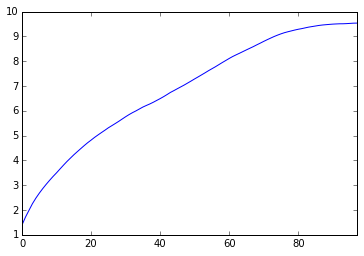

In [97]:
#ts = np.random.randn(1000)
#ts = np.cumsum(np.random.randn(1000))+100
ts = np.cumsum(np.random.randn(1000)+1)+100

def std_with_lag(lag):
    d_lag = np.subtract(ts[lag:], ts[:-lag])
    
    return np.std(d_lag)

G = []

for i in range(2,100):
    G.append(std_with_lag(i))
    
grow = pd.Series(G)
grow.plot()


Definition of Hurst Exponent in the book is a little different but I think it's basically same thing. For example, I suspect he is taking logarithm to regularize time series to work well with NumPy 'polyfit'. 

In 'hursts(ts)' function, I was confused with 'sqrt' in defining 'tau' but he multiplies 2.0 before returing it.

I have been playing with time series analysis lately and I rather use existing libraries to find metric like Hurst Exponent. Different libraries use different numerical algorithms and precision seems to matter in practice.   I find R libraries more reliable than ones in Python somehow.  I didn't find usable one in C/C++.  It's funny since most R libraries are written in C++.       